In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl


Bad key text.latex.preview in file /Users/patrickthornquist/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/patrickthornquist/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/patrickthornquist/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpls

In [2]:
# Read CSV File
import os
# df = pd.read_csv("desktop\Word_Cloud_NVDA.csv")
# read the whole text
text = open('nio_text.rtf', encoding="utf8").read()

comment_words = ""
stopwords = set(STOPWORDS)

In [3]:
# read the mask/color image taken from
#coloring = np.array(Image.open('.jpg'))
stopwords = set(STOPWORDS)
custom_stop_words = [""]
[stopwords.add(n) for n in custom_stop_words]

[None]

In [4]:
wc = WordCloud(background_color="white" , width=500, max_words=3500, 
              stopwords=stopwords, max_font_size=100, random_state=42)

#generate word cloud
wc_image= wc.generate(text)

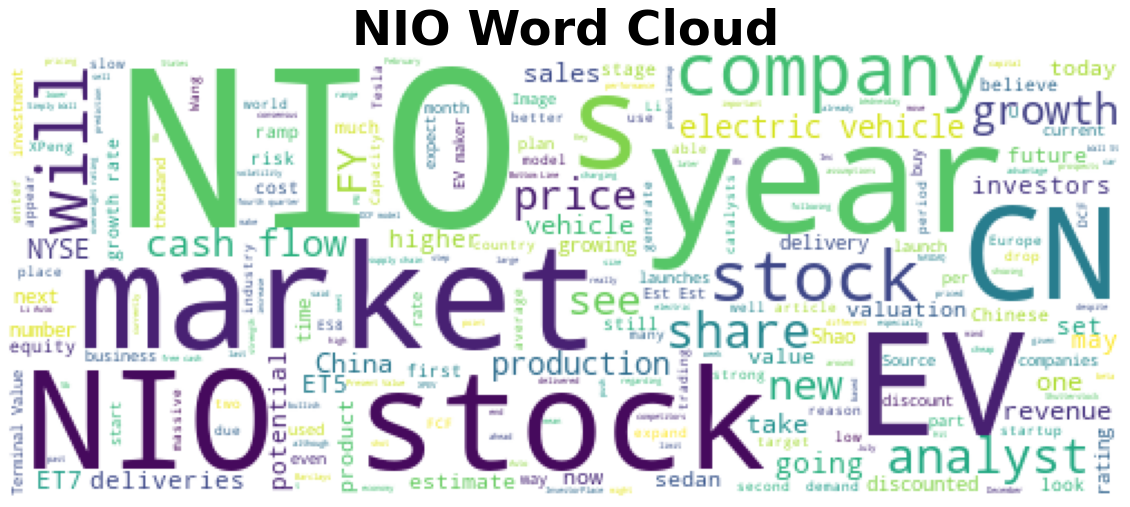

In [5]:
mpl.rcParams["figure.figsize"]=[20.0,10.0]



plt.imshow(wc_image)
plt.axis("off")
fontdict={"fontsize": 48, "fontweight":"bold"}
plt.title("NIO Word Cloud", fontdict=fontdict)
plt.show()